# Material de Apoio {.unnumbered}

1. A explicação do pandas sobre o GroupBy, e o método de `split-apply-combine` é uma boa referência: [https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
2. Essa postagem mostra algumas funcionalidades úteis do groupby, e é feita em português: [https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034](https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034)
3. [Essa postagem em inglês tem conteúdo semelhante, mas inclui uma explicação de como o groupby funciona no início](https://towardsdatascience.com/5-pandas-group-by-tricks-you-should-know-in-python-f53246c92c94)

# Caso 2

Em 2017, o MP questionou judicialmente os gastos com saúde do Estado. Segundo o MP, [os investimentos foram realizados abaixo dos limites mínimos estabelecidos por lei](https://oglobo.globo.com/rio/rj-investiu-apenas-6-da-receita-na-saude-ate-fim-de-outubro-dizmp-22191439). Trata-se de uma violação grave com repercussões jurídicas relevantes.

Como parte do seu papel de fiscalização, o MP do Rio de Janeiro usou os dados publicados pelo Estado sobre as previsões e execuções orçamentárias para verificar se os limites estavam sendo respeitados. Os dados estão disponíveis na seguinte URL:

http://bit.ly/3bMquz7

Para recriar os passos do MP, podemos ler o arquivo simplesmente passando a URL como argumento para a função `pd.read_csv`:

In [1]:
import pandas as pd

despesas18 = pd.read_csv("http://bit.ly/3bMquz7")

Qual é o tipo de `despesas18`?

In [2]:
type(despesas18)

pandas.core.frame.DataFrame

Trata-se de um `DataFrame`: uma estrutura de dados que alia algumas das vantagens de dicionários a uma série de métodos próprios que facilitam imensamente a vida de quem está analisando dados.

A seguir, vemos alguns desses métodos no contexto dos dados do Estado do Rio de Janeiro. Para recapitular com mais detalhes, volte a primeira parte da apostila em que apresentamos com maior minúcia as funções do pandas. Nessa aula, vamos seguir um fluxo que seria natural para entender e explorar um conjunto de dados desconhecido.

Se quisermos dar uma olhada nos dados que acabamos de baixar, podemos usar o método `.head()`, que mostra apenas as 5 primeiras linhas.

In [3]:
despesas18.head()

,Poder,Elemento,Sub Elemento,Órgão,UO,UG,Credor,Fonte de Recursos,Função,Sub Função,Licitação,Valor Empenhado,Valor Liquidado,Valor Pago
0,Executivo,Outros Serviços de Terceiros - Pessoa Física,NaN,Secretaria de Estado da Casa Civil e Desenvol,Departamento de Trânsito do Estado do Rio de,DEPARTAMENTO DE TRANSITO DO RIO DE JANEIRO,ALEXANDRE CESAR DE SOUZA,Taxas pelo Exercício do Poder de Polícia e por...,Segurança Pública,Administração Geral,DISPENSA,0,0,0
1,Executivo,Diárias - Civil,NaN,Secretaria de Estado de Transportes,Instituto de Pesos e Medidas do Estado do Rio,INSTITUTO DE PESOS E MEDIDAS DO RJ,LUIS ALEXANDRE FERREIRA SILVEIRA,Transferências Voluntárias,Indústria,Administração Geral,NAO APLICAVEL,0,0,0
2,Executivo,Outros Serviços de Terceiros - Pessoa Jurídic,NaN,Secretaria de Estado de Saúde,Fundo Estadual de Saúde,FUNDO ESTADUAL DE SAUDE - FES,BRASIL SUL IND E COM LTDA,Adicional do ICMS - FECP,Saúde,Assistência Hospitalar e Ambulatorial,PREGÃO ELETRÔNICO,0,0,0
3,Executivo,Material de Consumo,NaN,Secretaria de Estado da Casa Civil e Desenvol,Subsecretaria de Estado de Governo,SUBSEC. DE REC. LOGISTICOS - SEFAZ-LOGISTICA,PETROBRAS DISTRIBUIDORA S/A,Ordinários Provenientes de Impostos,Administração,Administração Geral,PREGÃO ELETRÔNICO,0,0,0
4,Executivo,Outros Serviços de Terceiros - Pessoa Jurídic,NaN,Secretaria de Estado de Ciência Tecnologia I,Subsecretaria de Cultura,SECRETARIA DE ESTADO DE CULTURA,NaN,Ordinários Provenientes de Impostos,Cultura,Administração Geral,DISPENSA,0,0,0


Por que não podemos simplesmente dar `print` em `despesas18`? Até podemos, mas, como o arquivo é muito grande, essa parece ser uma má ideia. O atributo `.shape` nos permite ver quantas linhas e colunas um `DataFrame` possui:

In [4]:
despesas18.shape

(99190, 14)

Estamos falando de 99.190 linhas! Não faz sentido imprimirmos todas elas e é quase impossível imaginar que uma pessoa ou um grupo pequeno de pessoas poderia fazer qualquer verificação exaustiva de maneira manual. Mesmo no Excel, é difícil lidar com esse volume de dados.

O `pandas`, porém, facilita a nossa vida. As informações em um `DataFrame` são armazenadas como uma tabela, em **linhas** e **colunas**. O atributo `.shape` nos informa quantas linhas (primeiro elemento) e quantas colunas (segundo elemento) um `DataFrame` contém. `DataFrames` podem ter seus elementos acessáveis através de índices.

No caso anterior, verificamos como fazer as coisas mais básicas com o Pandas, podemos seguir adiante com o nosso objetivo de investigar apenas os gastos com saúde e sua relação com os demais gastos do governo.

Uma avaliação preliminar nos mostra que essa informação está contida na coluna "Função". O Pandas possui um método que vai ser bastante útil na hora de trabalhar com dados do direito: `.value_counts()`, que retorna o número de ocorrências que cada categoria possui.

In [5]:
despesas18["Função"].value_counts()

Função
Educação                 30536
Segurança Pública        12789
Saúde                    11429
Transporte                5669
Essencial à Justiça       5416
Agricultura               4918
Administração             4476
Assistência Social        2720
Judiciária                2428
Comércio e Serviços       2408
Gestão Ambiental          2326
Previdência Social        2175
Legislativa               2113
Indústria                 1960
Cultura                   1587
Ciência e Tecnologia      1586
Encargos Especiais        1138
Urbanismo                  731
Direitos da Cidadania      644
Desporto e Lazer           528
Trabalho                   520
Habitação                  518
Organização Agrária        230
Saneamento                 188
Comunicações               157
Name: count, dtype: int64

De pronto, essa função nos informa que a rúbrica mais frequente é referente a "Educação", seguida por "Segurança Pública" e "Saúde". Mas isso não é suficiente para responder as perguntas que propusemos anteriormente. Para tal, precisamos saber qual **valor** foi efetivamente pago para cada uma dessas rúbricas.

Para descobrir isso, precisamos pegar a soma dos montantes registrados nas 11.429 linhas dedicadas à saúde e comparar o valor resultante com o gasto global. Para fazer isso, podemos usar duas ferramentas: o método `.sum()`, próprio das `Series`, estrutura de dados contida em cada coluna de um `DataFrame`, e a indexação lógica, onde podemos escolher subseções de um `DataFrame` com base em condições lógicas.

Antes disso, porém, precisamos transformar a coluna "Valor Pago" em uma coluna numérica. Se acessarmos os tipos das colunas contidas em `despesas18`, veremos que, por enquanto, "Valor Pago" é do tipo `object`:

In [6]:
despesas18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99190 entries, 0 to 99189
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Poder              99190 non-null  object
 1   Elemento           99190 non-null  object
 2   Sub Elemento       68505 non-null  object
 3   Órgão              99190 non-null  object
 4   UO                 99190 non-null  object
 5   UG                 99190 non-null  object
 6   Credor             69866 non-null  object
 7   Fonte de Recursos  99190 non-null  object
 8   Função             99190 non-null  object
 9   Sub Função         99190 non-null  object
 10  Licitação          99190 non-null  object
 11  Valor Empenhado    98304 non-null  object
 12  Valor Liquidado    98304 non-null  object
 13  Valor Pago         98304 non-null  object
dtypes: object(14)
memory usage: 10.6+ MB


Vamos imprimir os 5 primeiros valores de "Valor Pago" para darmos uma olhada em seu conteúdo.

In [7]:
despesas18.iloc[0:5]["Valor Pago"]

0    0
1    0
2    0
3    0
4    0
Name: Valor Pago, dtype: object

Isso não foi muito informativo... Quando o valor é 0 - e aparentemente o valor é 0 na maioria dos casos - nós não temos como saber porque a coluna não foi interpretada pelo Python como do tipo `float`. Podemos usar a **indexação lógica** para resolver esse problema. Sabemos que existem valores pagos pelo Estado. Portanto, nem todas as colunas podem ter valor = 0. Para saber quais valores estão preenchidos, portanto, basta *eliminar* o caracter "0" dessa coluna e ver o que permanece preenchido!

Podemos filtrar a tabela utilizando o `query`. **Note que como a coluna é do tipo object, ela armazena valores em texto. Assim precisamos delimitar o 0 como string dentro do query**.

Vamos nos restringir a coluna de interesse.

In [8]:
despesas18.query("`Valor Pago` != '0'")["Valor Pago"]

360           112440
361      15716395,53
365         310484,5
366         38402,37
390        209623,99
            ...     
99185            NaN
99186            NaN
99187            NaN
99188            NaN
99189            NaN
Name: Valor Pago, Length: 54061, dtype: object

Agora podemos ver que o comportamento dos números. Valores decimais estão sendo representados com vírgula, o que é o padrão fora dos Estados Unidos.

O que acontece se tentarmos simplesmente transformar o valor pago como está acima em `float`? Em tese, isso pode ser feito para cada célula através do método `.astype()`. 

In [9]:
despesas18["Valor Pago Float"] = despesas18["Valor Pago"].astype("float")

ValueError: could not convert string to float: '15716395,53'

A mensagem de erro aponta para o problema: o Python/Pandas não sabe como lidar com vírgulas como separador de decimais!

Precisamos de 2 passos, portanto: primeiro, precisamos substituir as vírgulas por pontos e depois transformar a variável em float:

In [10]:
despesas18["Valor Pago Float"] = despesas18["Valor Pago"].str.replace(",", ".")

despesas18["Valor Pago Float"] = despesas18["Valor Pago Float"].astype("float")

Agora, podemos confirmar o tipo da nova variável invocando o atributo `.dtypes`:

In [11]:
despesas18.dtypes

Poder                 object
Elemento              object
Sub Elemento          object
Órgão                 object
UO                    object
UG                    object
Credor                object
Fonte de Recursos     object
Função                object
Sub Função            object
Licitação             object
Valor Empenhado       object
Valor Liquidado       object
Valor Pago            object
Valor Pago Float     float64
dtype: object

A coluna "Valor Pago Float" não é mais do tipo `object`, agora ela é um novo tipo de `float`: `float64`. Isso tem a ver com o número de bits que um número pode ocupar, o que limita a quantidade de números à direita da vírgula, mas isso não é importante. O importante é que podemos usar essa variável, aliada ao método `.sum()` para verificar se o Estado respeitou o investimento mínimo legal em saúde no ano de 2018.

In [12]:
valor_pago_total = despesas18["Valor Pago Float"].sum()
valor_pago_total

np.float64(39367403957.09)

Para calcular qual valor foi gasto especificamente com saúde, podemos usar o índice lógico:

In [13]:
valor_pago_saude = despesas18.query("Função == 'Saúde'")["Valor Pago Float"].sum()
valor_pago_saude

np.float64(2424204722.47)

In [14]:
valor_pago_saude / valor_pago_total

np.float64(0.0615789835954729)

Ou poderiamos fazer a conta direto das colunas

In [15]:
despesas18.query("Função == 'Saúde'")["Valor Pago Float"].sum() / despesas18["Valor Pago Float"].sum()

np.float64(0.0615789835954729)

In [16]:
despesas18.query("Função == 'Saúde' and `Valor Pago Float` != 0")["Valor Pago Float"].sum() / despesas18.query("`Valor Pago Float` != 0")["Valor Pago Float"].sum()

np.float64(0.0615789835954729)

Segundo o Ministério Público, o valor mínimo a ser investido seria de 12%. Claramente, o Estado não parece ter cumprido com esse requisito legal, haja vista que apenas 6% do valor efetivamente pago teve como destino essa função.

#### Exercício

O que aconteceria se levássemos em conta não o valor pago e sim o valor liquidado? E se levássemos em conta o valor empenhado? Esses são os desafios dessa aula! Crie variáveis chamadas "razao_liquidado" e "razao_empenhado" com suas respostas.

In [17]:
# implemente seu código aqui

In [ ]:
# rode essa célula para verificar se você acertou o % liquidado na saúde
from correcoes import aula10_ex1

aula10_ex1(despesas18, razao_liquidado)

In [ ]:
# implemente seu código aqui

In [ ]:
# rode essa célula para verificar se você acertou o % empenhado na saúde
from correcoes import aula10_ex2

aula10_ex2(despesas18, razao_empenhado)

# Agrupando Dados

Uma maneira interessante de colocar esses dados em perspectiva é verificar qual é o % do orçamento gasto com outras funções. Mas seria extremamente chato fazer essa conta função por função. Uma opção seria usar um `for` loop, mas o Pandas nos fornece um método elegante para fazer esse tipo de coisa: o método `groupby`.

A ideia do `groupby` é agrupar os dados de acordo com o valor de uma coluna (ou várias!). Assim, criamos uma espécie de identificador para cada grupo e selecionamos todas as linhas que possuem o mesmo valor do identificador. Em seguida, podemos aplicar aplicar alguma função de resumo para cada grupo para gerar novos valores.

Essa estratégia é chamada em inglês de "split-apply-combine". Primeiro, dividimos os dados em grupos (identificados pelo valor comum nas colunas selecionadas). Depois, aplicamos uma função para em cada grupo que pode gerar novos valores, ou filtrar parte dos valores antigos (o "apply"). Por fim, combinamos os resultados em um novo conjunto de dados.

Vamos ver como isso funciona na prática, para uma explicação mais detalhada, veja a explicação de groupby do pandas em: [https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#)

In [18]:
funcoes_pagas = despesas18.groupby("Função")["Valor Pago Float"].sum()

A ideia da sintaxe mais simples é: `dataframe.groupby("coluna_agrupadora")["coluna_agrupada"].metodo_agrupamento()`.

Como resultado recebemos uma variável do tipo `pd.Series`.

In [19]:
funcoes_pagas

Função
Administração            1.607817e+09
Agricultura              2.455236e+08
Assistência Social       2.440759e+08
Ciência e Tecnologia     7.515062e+07
Comunicações             3.664972e+06
Comércio e Serviços      1.646209e+08
Cultura                  7.532741e+07
Desporto e Lazer         1.843662e+07
Direitos da Cidadania    5.680392e+07
Educação                 4.098150e+09
Encargos Especiais       2.174700e+09
Essencial à Justiça      1.685453e+09
Gestão Ambiental         1.565200e+08
Habitação                4.750836e+07
Indústria                6.326317e+07
Judiciária               3.094868e+09
Legislativa              9.244184e+08
Organização Agrária      6.918813e+06
Previdência Social       1.439876e+10
Saneamento               5.603955e+07
Saúde                    2.424205e+09
Segurança Pública        6.674909e+09
Trabalho                 9.293780e+06
Transporte               7.022514e+08
Urbanismo                3.587235e+08
Name: Valor Pago Float, dtype: float64

Mas vamos alterar o comportamento para que o resultado seja um `DataFrame`: podemos adicionar o argumento `as_index=False` ao método `groupby`.

In [20]:
funcoes_pagas = despesas18.groupby("Função", as_index=False)["Valor Pago Float"].sum()

funcoes_pagas.head(3)

,Função,Valor Pago Float
0,Administração,1.607817e+09
1,Agricultura,2.455236e+08
2,Assistência Social,2.440759e+08



*Atenção:* Considere o que acontece com a unidade de análise quando fazemos um groupby. Inicialmente, nosso dataframe apresentava uma linha para cada despesa incorrida pelo Estado do Rio de Janeiro. Após o groupby, qual é a unidade de análise do nosso novo conjunto de dados?


Podemos ordenar os valores em `funcoes_pagas` descrescente através do método `.sort_values()`:

In [21]:
funcoes_pagas.sort_values("Valor Pago Float", ascending=False, inplace=True)

In [22]:
funcoes_pagas.head(3)

,Função,Valor Pago Float
18,Previdência Social,1.439876e+10
21,Segurança Pública,6.674909e+09
9,Educação,4.098150e+09


Poderiamos ordenar em ordem crescente alterando o valor do argumento `ascending` para `True`.

Também podemos evitar que o Python de usar notação científica pedindo o valor gasto com cada uma das funções em milhões de reais:

In [23]:
funcoes_pagas["valor_pago_milhoes"] = funcoes_pagas["Valor Pago Float"] / 1000000

funcoes_pagas[["Função", "valor_pago_milhoes"]]

,Função,valor_pago_milhoes
18,Previdência Social,14398.761171
21,Segurança Pública,6674.908626
9,Educação,4098.149843
15,Judiciária,3094.867999
20,Saúde,2424.204722
10,Encargos Especiais,2174.700350
11,Essencial à Justiça,1685.452792
0,Administração,1607.817429
16,Legislativa,924.418409
23,Transporte,702.251428


Vamos observar cada uma das funções com maior quantidade de gastos. No final das contas, o investimento abaixo do mínimo em saúde está justificado? Ou existem outras rúbricas que poderiam ser reduzidas?

### Outros detalhes do groupby

Também podemos fazer agrupamento por múltiplas colunas, a ideia é semelhante a de selecionar várias colunas: em vez de passar uma string com o nome da coluna para o `groupby` devemos passar uma lista com o nome das colunas que queremos usar.

In [24]:
despesas18.groupby(["Poder", "Fonte de Recursos"], as_index=False)["Valor Pago Float"].sum().head()

,Poder,Fonte de Recursos,Valor Pago Float
0,Executivo,Adicional do ICMS - FECP,1.480718e+09
1,Executivo,Alienação de Bens,0.000000e+00
2,Executivo,Compensação Financeira pela Exploração de Petr...,1.032864e+09
3,Executivo,Contratos Intraorçamentários Gestão de Saúde,2.098283e+08
4,Executivo,Contribuição de Intervenção no Domínio Econômi...,3.963611e+07


E se quisermos fazer operações de agrupamento em múltiplas colunas, ou ainda, múltiplas operações na mesma coluna?

Uma opção é fazê-las individualmente e juntá-las depois com o `merge`, tópico de nossas próximas aulas. Mas isso seria um tanto trabalhoso.

Outra opção é usar o método `.agg` junto ao groupby. Veja a descrição e os exemplos [na documentação do pandas](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

A premissa é criar um dicionário listando as operações que queremos fazer em cada coluna. Por exemplo, se quisermos saber a soma dos pagamentos por Poder e o número de funções nas quais cada um gastou, podemos fazer:

In [25]:
despesas18.groupby(["Poder"], as_index=False).agg(
    {
        "Valor Pago Float": "sum",
        "Função": "nunique",
    }
)

,Poder,Valor Pago Float,Função
0,Executivo,3.437531e+10,23
1,Judiciário,3.094868e+09,1
2,Legislativo,9.244184e+08,1
3,Ministério Público,9.728032e+08,1


Vamos agora supor também que queremos calcular duas agregações da mesma coluna. Além do pagamento total por poder, queremos saber o valor do pagamento mais elevado para cada poder. Podemos fazer isso alterando a estrutura do dicionário passado para o método `.agg` para incluir uma estrutura que nos deixa listar mais de um item: uma lista.

Veja:

In [26]:
despesas18.groupby(["Poder"], as_index=False).agg(
    {
        "Valor Pago Float": ["sum", "max"],
        "Função": ["nunique"],
    }
)

Poder Valor Pago Float                Função
                                   sum           max nunique
0           Executivo     3.437531e+10  1.929584e+09      23
1          Judiciário     3.094868e+09  7.052589e+08       1
2         Legislativo     9.244184e+08  1.585384e+08       1
3  Ministério Público     9.728032e+08  3.595991e+08       1

Novamente, temos uma linha de código um tanto longa com muitos objetos, aumentando a chance de errarmos alguma coisa.

Como de costume, podemos fazer essas coisas separado. Primeiro criamos o dicionário que elencará as operações que queremos fazer em cada coluna, guardamos isso em uma variável e depois passamos essa variável para o método `agg`:

In [49]:
# para facilitar leitura do código vamos criar um dicionario separado
group_functions = {"Valor Pago Float": ["sum", "max"], "Função": ["nunique"]}

despesas_poder = despesas18.groupby(["Poder"], as_index=False).agg(group_functions)

despesas_poder

Poder Valor Pago Float                Função
                                   sum           max nunique
0           Executivo     3.437531e+10  1.929584e+09      23
1          Judiciário     3.094868e+09  7.052589e+08       1
2         Legislativo     9.244184e+08  1.585384e+08       1
3  Ministério Público     9.728032e+08  3.595991e+08       1

Um detalhe importante de observar é que ao passar listas para o método `agg`, o Pandas cria um índice hierárquico para as colunas. Isso pode ser um pouco confuso, mas é uma maneira de manter a organização dos dados para o pacote. Assim, é melhor não usar listas se formos calcular um único valor para determinada coluna.

Se desejarmos múltiplos, o resultado pode dificultar o acesso aos dados para outras casos já que acessar a coluna de interesse é um pouco mais complicado. 

Uma opção para lidar com isso é mudar a estrutura para usar agregações nomeadas. Deixamos esse caso apenas para referência, caso tenha interesse em se aprofundar. Confira a explicação do tópico [na documentação: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#named-aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#named-aggregation).

Outra é juntar as duas partes das colunas. Caso você se depare com esse tipo de caso, você pode usar o código abaixo para juntar o nome dos dois níveis de coluna:

In [50]:
# Aqui usamos o "_" como separados dos dois nomes
despesas_poder.columns = ["_".join(col_name).rstrip('_') for col_name in despesas_poder.columns]   

despesas_poder

,Poder,Valor Pago Float_sum,Valor Pago Float_max,Função_nunique
0,Executivo,3.437531e+10,1.929584e+09,23
1,Judiciário,3.094868e+09,7.052589e+08,1
2,Legislativo,9.244184e+08,1.585384e+08,1
3,Ministério Público,9.728032e+08,3.595991e+08,1


## Operações de Agregação

Para uma lista das opções de funções de agregação, sugerimos consultar o cheatsheet a algumas das referências indicadas no início do notebook.

Além disos, veja a [ a lista de estatísticas descritivas para o GroupBy na API do pandas: https://pandas.pydata.org/pandas-docs/version/0.23/api.html#id39](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).


Destacamos aqui algumas das funções mais comuns de serem usadas nas agregações para obter informações sobre cada grupo:
- `mean`: média dos valores da coluna
- `median`: mediana dos valores da coluna
- `sum`: soma dos valores da coluna
- `max`: valor máximo da coluna
- `min`: valor mínimo da coluna
- `count`: contagem de linhas não nulas na coluna
- `nunique`: número de valores únicos na coluna
- `nlargest`: n maiores valores da coluna
- `nsmallest`: n menores valores da coluna

# Resumo

* Vimos como ler arquivos processáveis usando Pandas (o procedimento que usamos para ler arquivos .csv pode ser replicado para arquivos .xlsx);
* Aprendemos a usar o Pandas para começar a fazer análise de dados.
* Conseguimos gerar as estatísticas descritivas básicas a respeito dos gastos do Estado por função.

# Uma breve introdução: como gerar gráficos com o Seaborn

Mais a frente do curso iremos dedicar mais tempo à visualização de dados. Contudo, pode ser interessante ter alguma ideia de como gerar alguns gráficos sobre os dados que estamos explorando. 

Em muitos sentidos, a comunicação dos dados é tão importante quanto as inferências que conseguimos extrair deles. Nesse contexto, nada ajuda mais que um gráfico. Se uma imagem vale por mil palavras, um gráfico vale por pelo menos dez tabelas. A principal biblioteca de visualização de dados que vamos utilizar ao longo do curso se chama `Seaborn`. O primeiro passo para usarmos o `Seaborn`, naturalmente, é realizar a importação do pacote com sua notação canônica.

In [51]:
import seaborn as sns

Uma das formas mais comuns e úteis de apresentar informações quantitativas visualmente é o **gráfico de barras**. Ele permite que possamos comparar quantidades de maneira rápida e intuitiva. Um bom uso do gráfico de barras, por exemplo, é mostrar quais foram as funções com mais dinheiro pago e qual é a diferença entre elas.

Um dos argumentos apresentados pelo Governo do Estado em contraposição ao MP foi o de que o Estado atravessava importante e notória crise fiscal. Se o MP quer contra-argumentar com dados, uma forma eficiente é mostrar que os gastos com outras funções foram elevados. Representar essa discrepância visualmente é uma maneira eficiente de fazer esse ponto.

In [59]:
funcoes_pagas = despesas18.groupby("Função", as_index=False)["Valor Pago Float"].sum()

funcoes_pagas.head()

,Função,Valor Pago Float
0,Administração,1.607817e+09
1,Agricultura,2.455236e+08
2,Assistência Social,2.440759e+08
3,Ciência e Tecnologia,7.515062e+07
4,Comunicações,3.664972e+06


Em primeiro lugar, vamos usar o próprio Pandas para gerar a visualização. Isso é possível usando o método `.plot.bar()`, nativo de DataFrames. Assim, é importante verificar que nosso agrupamento criou um DataFrame e não uma Series.

In [60]:
type(funcoes_pagas)

pandas.core.frame.DataFrame

Cuidamos desse problema ao adicionar o argumento `as_index=False` ao método `groupby`. Contudo, se não o tivéssemos feito, poderíamos resolver o problema de outra forma. Nesse caso, a coluna que usamos para identificar os grupos estaria guardada no índice do DataFrame. Para alterar isso e guardar "Função" como uma coluna, basta chamarmos o método `.reset_index()` e salvarmos o resultado em uma nova variável.

Exemplo:

```python
funcoes_pagas = despesas18.groupby("Função")["Valor Pago Float"].sum()

funcoes_pagas_df = funcoes_pagas.reset_index()
```

Agora, para fazer um gráfico de barras usando o Pandas, basta chamarmos `.plot.bar()` dando os argumentos referentes aos eixos X e Y:

<Axes: xlabel='Função'>

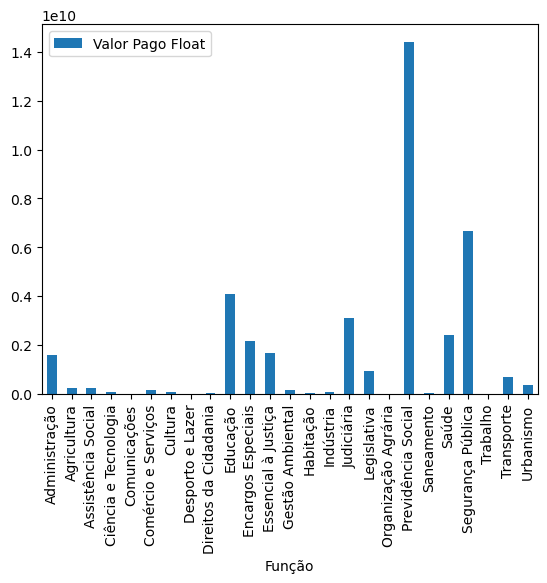

In [61]:
funcoes_pagas.plot.bar(x="Função", y="Valor Pago Float")

O gráfico é bastante simplificado e esteticamente, não é muito bonito. Para fazer o mesmo gráfico usando o `seaborn`, basta usarmos a função `barplot()`:

<Axes: xlabel='Função', ylabel='Valor Pago Float'>

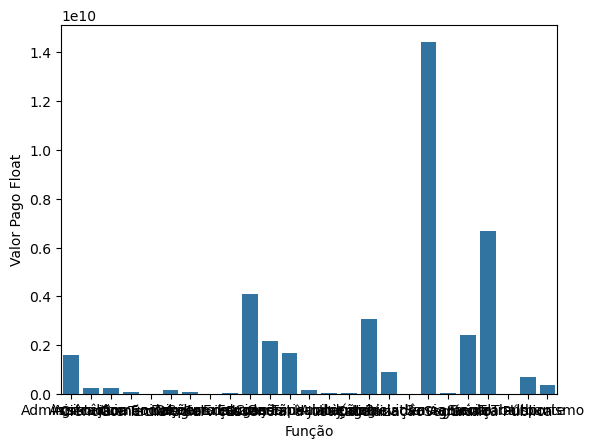

In [62]:
sns.barplot(x="Função", y="Valor Pago Float", data=funcoes_pagas)

Uma primeira reação é notar que o gráfico está ainda mais feio! Por que usar o `seaborn` ao invés do próprio Pandas? Uma vantagem do seaborn é a maior quantidade de opções. Se quisermos mudar a cor das barras para azul claro, por exemplo, podemos fazer isso introduzindo um único argumento.

<Axes: xlabel='Função', ylabel='Valor Pago Float'>

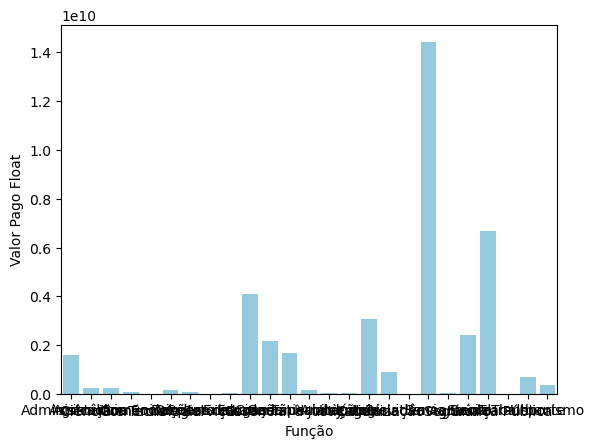

In [63]:
sns.barplot(x="Função", y="Valor Pago Float", data=funcoes_pagas, color="skyblue")

Tanto o Pandas quanto o Seaborn, "por trás dos panos", usam a mesma biblioteca, chamada `matplotlib`. Infelizmente, quando queremos alterar aspectos que não constam da lista de argumentos aceitos pelas funções do Seaborn, precisamos fazer chamados manuais a essa função. Assim, se queremos alterar o ângulo com o qual são apresentados os nomes das funções, podemos fazer isso usando esse módulo, seja importando ele diretamente (canonicamente `from matplotlib import pyplot as plt`), seja usando algum dos métodos que o pacote implementa em objetos reconhecidos como gráficos, como fazemos abaixo com o método `set_xticklabels`.

C:\Users\jlnun\AppData\Local\Temp\ipykernel_2464\1358065895.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(labels=funcoes_pagas["Função"], rotation=90)


[Text(0, 0, 'Administração'),
 Text(1, 0, 'Agricultura'),
 Text(2, 0, 'Assistência Social'),
 Text(3, 0, 'Ciência e Tecnologia'),
 Text(4, 0, 'Comunicações'),
 Text(5, 0, 'Comércio e Serviços'),
 Text(6, 0, 'Cultura'),
 Text(7, 0, 'Desporto e Lazer'),
 Text(8, 0, 'Direitos da Cidadania'),
 Text(9, 0, 'Educação'),
 Text(10, 0, 'Encargos Especiais'),
 Text(11, 0, 'Essencial à Justiça'),
 Text(12, 0, 'Gestão Ambiental'),
 Text(13, 0, 'Habitação'),
 Text(14, 0, 'Indústria'),
 Text(15, 0, 'Judiciária'),
 Text(16, 0, 'Legislativa'),
 Text(17, 0, 'Organização Agrária'),
 Text(18, 0, 'Previdência Social'),
 Text(19, 0, 'Saneamento'),
 Text(20, 0, 'Saúde'),
 Text(21, 0, 'Segurança Pública'),
 Text(22, 0, 'Trabalho'),
 Text(23, 0, 'Transporte'),
 Text(24, 0, 'Urbanismo')]

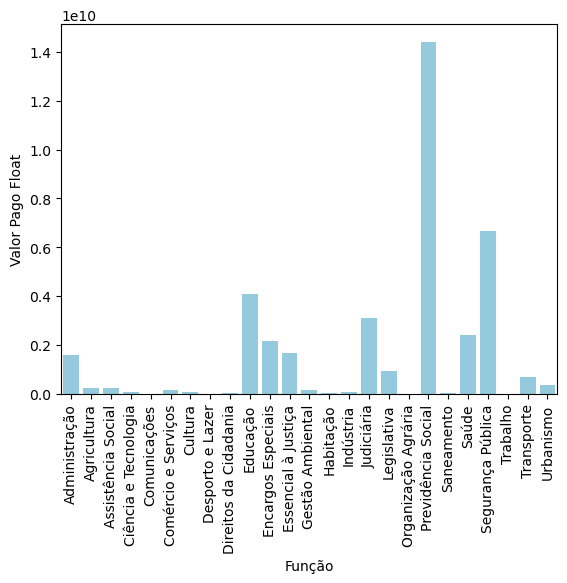

In [64]:
bars = sns.barplot(x="Função", y="Valor Pago Float", data=funcoes_pagas, color="skyblue")

bars.set_xticklabels(labels=funcoes_pagas["Função"], rotation=90)

Tanto no Pandas quanto no Seaborn, esse gráfico apresenta alguns problemas:

1) ele não está ordenado;

2) ele tem um excesso de barras.

Para resolver esses dois problemas, vamos respectivamente ordenar o dataframe e usar `.head()` para plotar apenas as 5 funções com mais gastos.

C:\Users\jlnun\AppData\Local\Temp\ipykernel_2464\1093558539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(labels=funcoes_pagas.head()["Função"], rotation=90)


[Text(0, 0, 'Previdência Social'),
 Text(1, 0, 'Segurança Pública'),
 Text(2, 0, 'Educação'),
 Text(3, 0, 'Judiciária'),
 Text(4, 0, 'Saúde')]

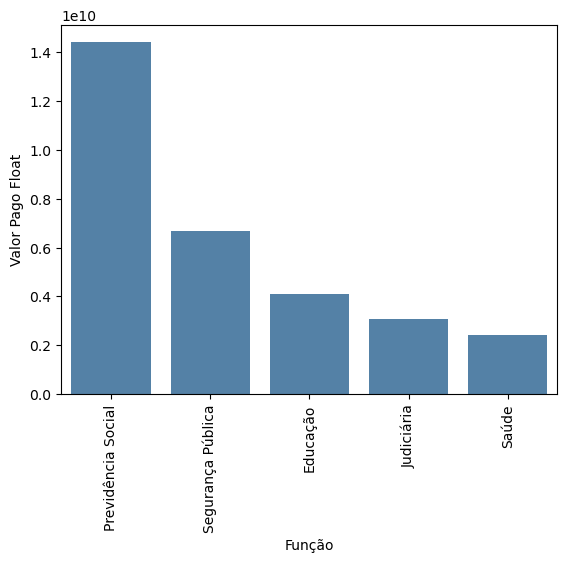

In [65]:
# por padrão, o Pandas ordena em ordem crescente. Quando queremos os top 5, precisamos ordenar por ordem decrescente.
funcoes_pagas.sort_values("Valor Pago Float", ascending=False, inplace=True)

bars = sns.barplot(x="Função", y="Valor Pago Float", data=funcoes_pagas.head(), color="steelblue")

# se esquecermos de adicionar .head() aos labels, teremos um excesso de labels
bars.set_xticklabels(labels=funcoes_pagas.head()["Função"], rotation=90)

O gráfico acima ainda está longe e estar pronto: falta acertar os nomes dos eixos, adicionar um título, alterar a forma de apresentação dos valores de notação científica para algo que advogados entendem, adicionar ajustes estéticos... Possivelmente uma ideia melhor seria também orientar as barras horizontalmente, já que os nomes das funções são longos.

Mas todas essas coisas são objeto de oturas aulas. A ideia, neste momento, é apenas introduzir duas maneiras de visualizar graficamente os dados.

## Desafio

Fizemos o gráfico para os valores efetivamente pagos. Faça o gráfico referente à diferença entre os valores empenhados e pagos.
